# Forecasting with Facebook Prophet

Files needed:


*   c02-ppm-daily_csv.csv
*   AirPassengers.csv



In [1]:
#!pip install prophet

In [2]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt



## Forecasting Carbon Dioxide Levels: Daily data

Illustrates simple Facebook Prophet use case on daily data.

In [3]:
 # Read in raw data
 df = pd.read_csv('co2-ppm-daily_csv.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19387 non-null  object 
 1   value   19387 non-null  float64
dtypes: float64(1), object(1)
memory usage: 303.1+ KB


In [5]:
# date is an object
# Convert to datetime for Prophet
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    19387 non-null  datetime64[ns]
 1   value   19387 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 303.1 KB


In [7]:
# Change name of columns
# Input to Prophet is a datestamp column and a numeric column
df.columns = ['ds','y']


In [8]:
df.head()

,ds,y
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [9]:
# Define model
model = Prophet()

# Fit model to data - 30 seconds
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvw1ce_a7/lay44aer.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvw1ce_a7/kze1lb11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14416', 'data', 'file=/tmp/tmpvw1ce_a7/lay44aer.json', 'init=/tmp/tmpvw1ce_a7/kze1lb11.json', 'output', 'file=/tmp/tmpvw1ce_a7/prophet_modeluwm2ylwp/prophet_model-20250219160425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
# Forecast for 10 years (365 days * 10)

# Create dataframe of future dates
future = model.make_future_dataframe(periods=365 * 10)
forecast = model.predict(future)

In [11]:
future.head()

,ds
0,1958-03-30
1,1958-03-31
2,1958-04-02
3,1958-04-03
4,1958-04-04


In [12]:
future.tail()

,ds
23032,2029-11-16
23033,2029-11-17
23034,2029-11-18
23035,2029-11-19
23036,2029-11-20


In [13]:
# Note that future goes 10 years beyond df
df.tail()

,ds,y
19382,2019-11-19,410.17
19383,2019-11-20,410.05
19384,2019-11-21,410.49
19385,2019-11-22,410.48
19386,2019-11-23,410.15


In [14]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-03-30,314.876810,315.999957,317.674192,314.876810,314.876810,1.985679,1.985679,1.985679,0.003257,0.003257,0.003257,1.982422,1.982422,1.982422,0.0,0.0,0.0,316.862490
1,1958-03-31,314.879212,316.046868,317.715729,314.879212,314.879212,2.015663,2.015663,2.015663,-0.010815,-0.010815,-0.010815,2.026479,2.026479,2.026479,0.0,0.0,0.0,316.894875
2,1958-04-02,314.884015,316.196468,317.879498,314.884015,314.884015,2.118861,2.118861,2.118861,0.003454,0.003454,0.003454,2.115407,2.115407,2.115407,0.0,0.0,0.0,317.002876
3,1958-04-03,314.886417,316.244422,317.913152,314.886417,314.886417,2.160477,2.160477,2.160477,0.000517,0.000517,0.000517,2.159959,2.159959,2.159959,0.0,0.0,0.0,317.046894
4,1958-04-04,314.888819,316.252223,317.984275,314.888819,314.888819,2.208149,2.208149,2.208149,0.003807,0.003807,0.003807,2.204342,2.204342,2.204342,0.0,0.0,0.0,317.096967


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23032,2029-11-16,435.104614,423.773894,442.224080,425.663007,444.337370,-2.007824,-2.007824,-2.007824,0.003807,0.003807,0.003807,-2.011631,-2.011631,-2.011631,0.0,0.0,0.0,433.096791
23033,2029-11-17,435.111018,423.571746,442.477470,425.663126,444.346165,-1.969398,-1.969398,-1.969398,-0.004586,-0.004586,-0.004586,-1.964813,-1.964813,-1.964813,0.0,0.0,0.0,433.141620
23034,2029-11-18,435.117422,423.744198,442.338965,425.663244,444.354960,-1.915141,-1.915141,-1.915141,0.003257,0.003257,0.003257,-1.918399,-1.918399,-1.918399,0.0,0.0,0.0,433.202281
23035,2029-11-19,435.123826,423.604855,442.500243,425.663363,444.363754,-1.883294,-1.883294,-1.883294,-0.010815,-0.010815,-0.010815,-1.872478,-1.872478,-1.872478,0.0,0.0,0.0,433.240532
23036,2029-11-20,435.130230,423.806714,442.747391,425.663482,444.372549,-1.822768,-1.822768,-1.822768,0.004365,0.004365,0.004365,-1.827133,-1.827133,-1.827133,0.0,0.0,0.0,433.307462


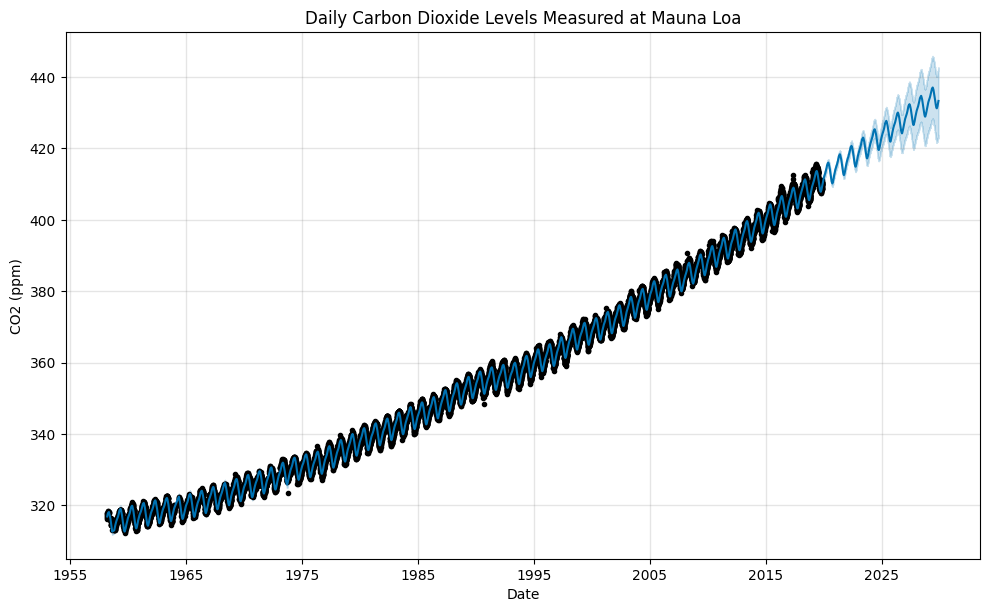

In [16]:
# Visualization
fig = model.plot(forecast, xlabel='Date', ylabel='CO2 (ppm)')
plt.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

In [17]:
# 5 minute exercise
# 1. Interpret the chart for a business audience. What does it show?
# 2. How does the Facebook Prophet forecast differ from a linear regression?

In [18]:
# Examine the forecast dataframe

forecast.head(10).T

,0,1,2,3,4,5,6,7,8,9
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00,1958-04-03 00:00:00,1958-04-04 00:00:00,1958-04-05 00:00:00,1958-04-06 00:00:00,1958-04-08 00:00:00,1958-04-10 00:00:00,1958-04-11 00:00:00
trend,314.87681,314.879212,314.884015,314.886417,314.888819,314.89122,314.893622,314.898425,314.903228,314.90563
yhat_lower,315.999957,316.046868,316.196468,316.244422,316.252223,316.250553,316.359093,316.431347,316.493789,316.542604
yhat_upper,317.674192,317.715729,317.879498,317.913152,317.984275,317.968411,318.01496,318.146704,318.166169,318.247512
trend_lower,314.87681,314.879212,314.884015,314.886417,314.888819,314.89122,314.893622,314.898425,314.903228,314.90563
trend_upper,314.87681,314.879212,314.884015,314.886417,314.888819,314.89122,314.893622,314.898425,314.903228,314.90563
additive_terms,1.985679,2.015663,2.118861,2.160477,2.208149,2.243787,2.295125,2.380886,2.45741,2.498886
additive_terms_lower,1.985679,2.015663,2.118861,2.160477,2.208149,2.243787,2.295125,2.380886,2.45741,2.498886
additive_terms_upper,1.985679,2.015663,2.118861,2.160477,2.208149,2.243787,2.295125,2.380886,2.45741,2.498886
weekly,0.003257,-0.010815,0.003454,0.000517,0.003807,-0.004586,0.003257,0.004365,0.000517,0.003807


In [19]:
# ds - datestamp
# trend - overall trend, shows long-term growth
# yhat_lower, yhat_upper - lower and upper bounds of forecast. Note that bounds increase over time.
# trend_lower, trend_upper - lower and upper bounds of trend
# additive_terms - combined effect of seasonal terms (weekly, yearly, etc)
# additive_terms_lower and _upper - lower and upper bounds of additive_terms
# weekly - weekly component's contribution to forecast
# weekly_lower and _upper - upper and lower bound of weekly seasonality component
# yearly - yearly component's contribution to forecast
# yearly_lower and _upper - upper and lower bound of yearly seasonality component
# multiplicative_terms - combined value of all of the multiplicative seasonalities
# multiplicative_terms_lower and _upper - upper and lower bounds of multiplicative seasonalities
# yhat - final predictive value


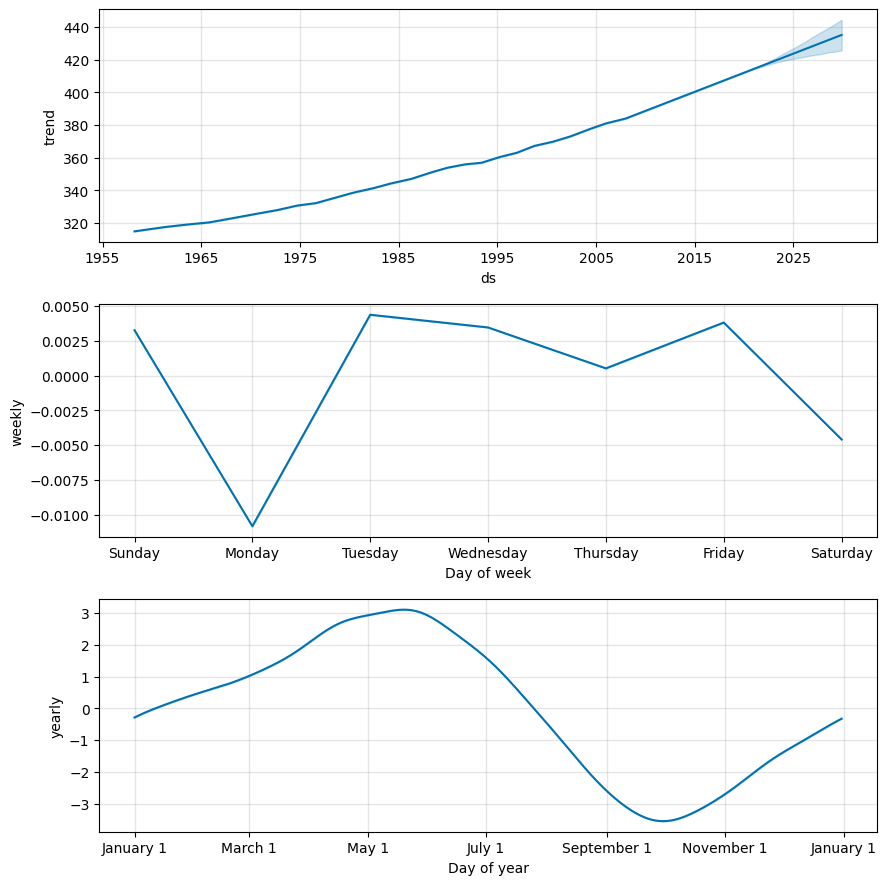

In [20]:
# Understanding components of the forecast

fig2 = model.plot_components(forecast)
plt.show()

In [21]:
# 5 minute exercise
# Interpret each of these graphs for a business audience

## Forecasting Air Passengers: Monthly Data

Facebook Prophet assumes daily data. Non-daily data requires some additional processing.

In [22]:
df = pd.read_csv('AirPassengers.csv')

In [23]:
# Create datetime column
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds','y']

In [24]:
# Number of passengers on commercial airlines per month (in 1K)
# So Jan, 1949 => 112,000 passengers

df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [25]:
# Fit model

# Use multiplicative mode when seasonality effects scale with the trend - need judgment & domain expertise
model=Prophet(seasonality_mode='multiplicative')
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvw1ce_a7/v8463gbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvw1ce_a7/hvn07xdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1254', 'data', 'file=/tmp/tmpvw1ce_a7/v8463gbg.json', 'init=/tmp/tmpvw1ce_a7/hvn07xdb.json', 'output', 'file=/tmp/tmpvw1ce_a7/prophet_modely155ko1x/prophet_model-20250219160451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


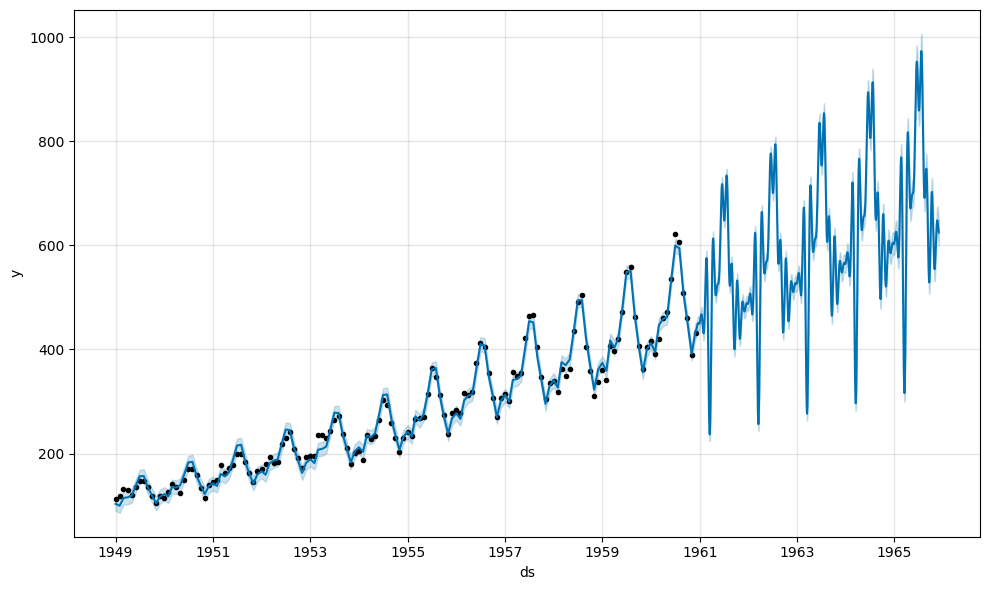

In [26]:
# Forecast

future = model.make_future_dataframe(periods = 365 * 5) # five years into the future
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvw1ce_a7/avjw0vc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvw1ce_a7/l9nwtfsn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34420', 'data', 'file=/tmp/tmpvw1ce_a7/avjw0vc8.json', 'init=/tmp/tmpvw1ce_a7/l9nwtfsn.json', 'output', 'file=/tmp/tmpvw1ce_a7/prophet_modeli_pz7yen/prophet_model-20250219160452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


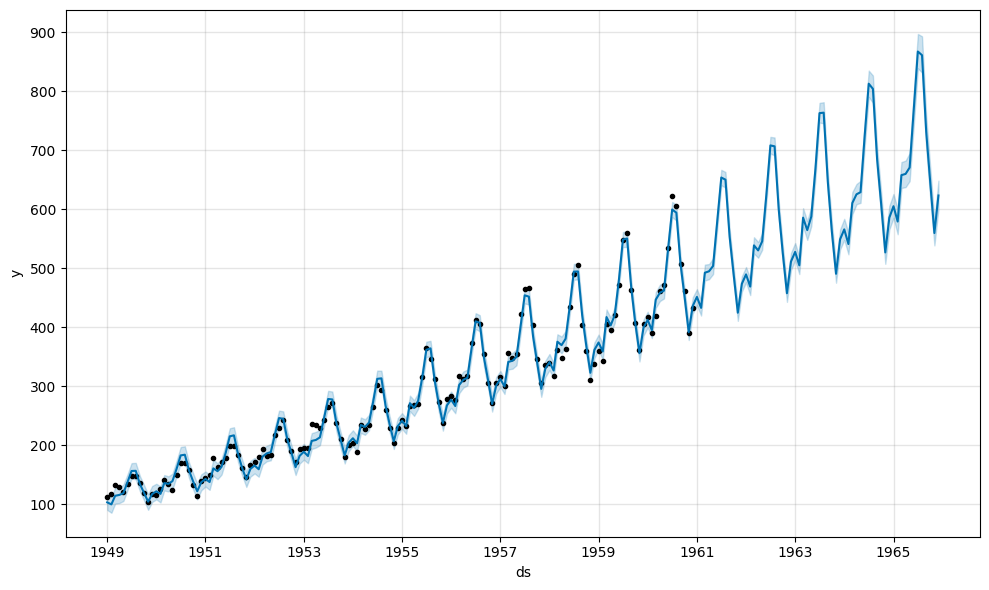

In [27]:
# Problem! It is creating a daily forecast from monthly data
# Solution: Create monthly forecasts, not daily forecasts

model = Prophet(seasonality_mode = 'multiplicative')
model.fit(df)
future=model.make_future_dataframe(periods=12*5, freq='MS') # monthly forecasts, please!
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()